#Creating filters with Image Processing Algorithms| Python OpenCV

In this project we created several filters using various image processing techniques.
Major libraries used:
* OpenCV
* Matplotlib
* Numpy

At first, required the libraries were imported

In [ ]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

For the first filter, we tried to highlight only an object of a particular shade range(i.e. the earring). We made two variations, one with the a grayscale background another with a blurred background.

Below, we have 2 functions:
* Blur Function:
Here operation keeps the kernel above a pixel, adds all the 625 pixels below this kernel, takes the average, and replaces the central pixel with the new average value. This operation is continued for all the pixels in the image. 
* Show Function:
This function is majorly used for displaying the image

In [ ]:
def blurimg(img):
  kernel = np.ones((25,25),np.float32)/625
  dst = cv2.filter2D(img,-1,kernel)
  return dst

In [ ]:
def show(title, img, color=True):
    plt.figure(figsize=(7,7))
    if color:
        plt.imshow(img[:,:,::-1]), plt.title(title, fontsize=(16))
        plt.show()
    else:
        plt.imshow(img, cmap='gray'), plt.title(title, fontsize=(16))
        plt.show()

The first filter involves highlighting a specific object based on colour and changing the background. There are two variations:
* Object with a blurred background
* Object with a grayscale background

The steps involved were:
1. We collected an image from the internet with an a golden earring. The golden shade's range was detected and only that colour was masked. Also, an inverted version of the mask was obtained by performing a NOT operator in the pixels.
2. We manipulated the pixels in certain way, such that we can obtain the background pixels.
3. We seperately, made a blurred image(using user defined function) and a grayscale (using a standard function).
4. Now, bitwise or was performed on them, inorder to find only the gray and blurred portion using the inverted mask we obtained before.
5. Now, the background image was added with gray portion and the blurred portion respectively (using simple matrix addition as they are of the same size) to get the desired filter.

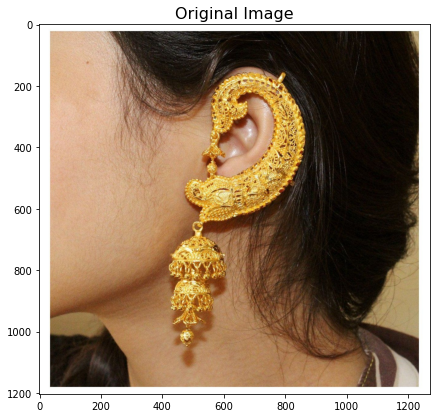

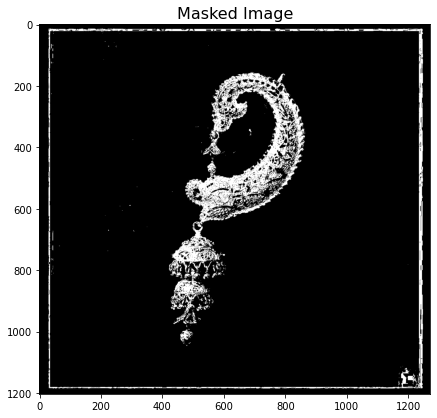

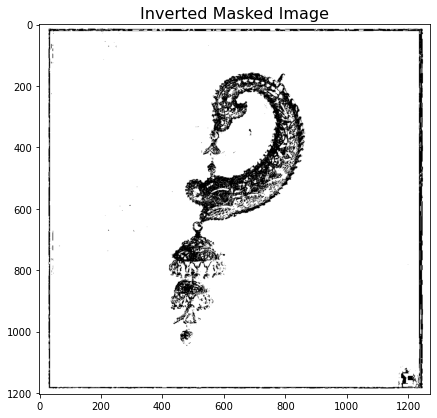

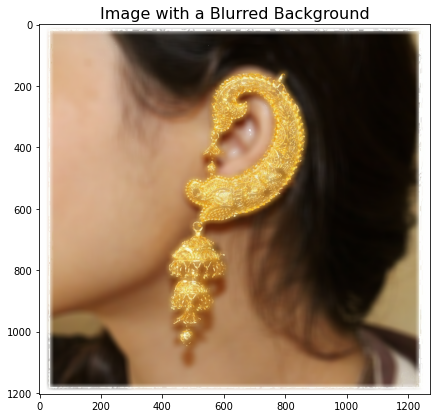

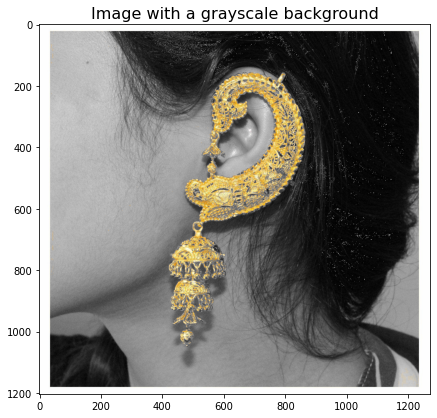

In [ ]:
img = cv2.imread('jhumka.jpg')
show('Original Image', img)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
mask=cv2.inRange(hsv,(18,0,200),(180,255,255))
mask_inv = cv2.bitwise_not(mask)
show('Masked Image', mask, False)
show('Inverted Masked Image', mask_inv, False)
res=255-cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
res = cv2.bitwise_and(img, img, mask=mask)
black_pixels = np.where(
    (res[:, :, 0] == 0) & 
    (res[:, :, 1] == 0) & 
    (res[:, :, 2] == 0)
)
res[black_pixels] = [255, 255, 255]
blur = blurimg(img)
blur = cv2.bitwise_or(blur, blur, mask = mask_inv)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
cv2.imwrite('gray.jpg', gray_image)
gray = cv2.imread('gray.jpg')
gray_portion = cv2.bitwise_or(gray, gray, mask = mask_inv)
added_image1 = res+gray_portion
added_image2= res+blur
show('Image with a Blurred Background', added_image2, True)
show('Image with a grayscale background', added_image1, True)


In the second and third filter, we used the very popular [Canny Edge detection algorithm](https://docs.opencv.org/master/da/d22/tutorial_py_canny.html) to obtain its lines.
1. In the first image, we simply used the Canny Edge Detection algorithmn to obtain the edges of the image.
2. Now, simply we performed bit-wise NOT operator on the image to get a different kind of filter 

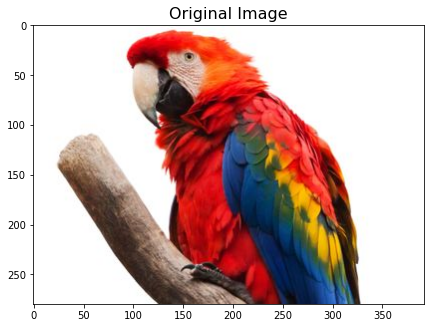

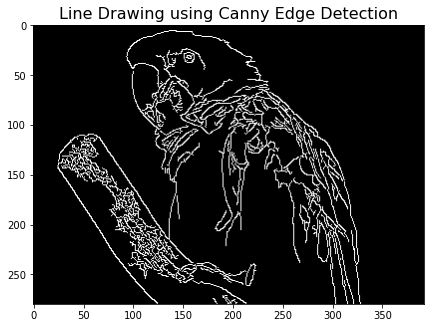

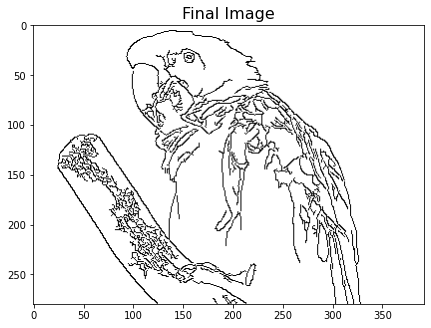

In [142]:
img=cv2.imread("parrot.jpg")
edge_img = cv2.Canny(img,450,20)
mask_inv = cv2.bitwise_not(edge_img)
show("Original Image",img,True)
show("Line Drawing using Canny Edge Detection",edge_img,False)
show("Final Image",mask_inv,False)

In the fourth filter, we tried to obtain a pencil sketched image of a given picture. And, the following steps were involved:

1. The grayscale image was obtained
2. The image pixels were inverted using the bit-wise NOT operator
3. The inverted image was smoothened using [Gaussian Blur](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)
4. The final pencil sketch of the input image using a blend function dodgev2, which divides the greyscale value of the image by the inverse of blurred image value which in turn highlights the boldest edges. 

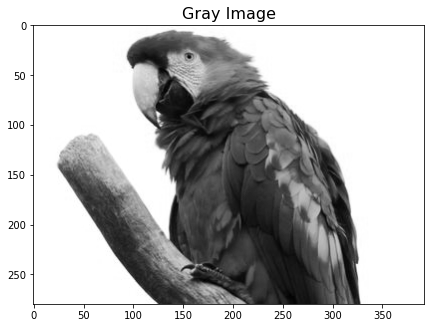

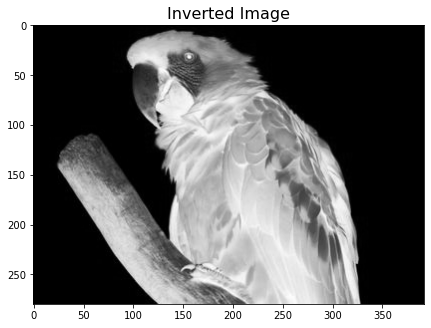

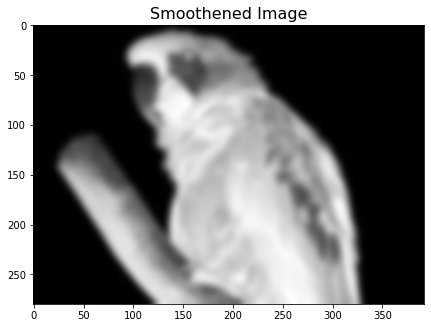

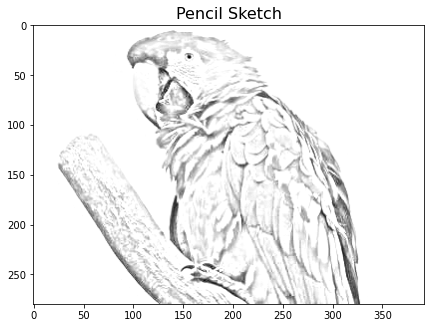

In [ ]:
img=cv2.imread("parrot.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show("Gray Image",img_gray,False)
img_invert = cv2.bitwise_not(img_gray)
show("Inverted Image",img_invert,False)
img_smoothing = cv2.GaussianBlur(img_invert, (21, 21),sigmaX=0, sigmaY=0)
show("Smoothened Image",img_smoothing,False)
def dodgeV2(x, y):
   return cv2.divide(x, 255 - y, scale=256)
final_img = dodgeV2(img_gray, img_smoothing)
show("Pencil Sketch",final_img,False)

In the next filter we created a water colour like effect. Here, we used the very popular unsupervised learning alogrithm, [K-Means Clustering](https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html).

The steps involved are:
1. We reshaped the image to an array of Mx3 size(3 colour values, i.e., RGB).
2. And after the clustering, we apply centroid values to all pixels, such that resulting image will have specified number of colors. As a result, it leads to an water colour like effect.
3. And then we reshaped it back to the shape of original image.

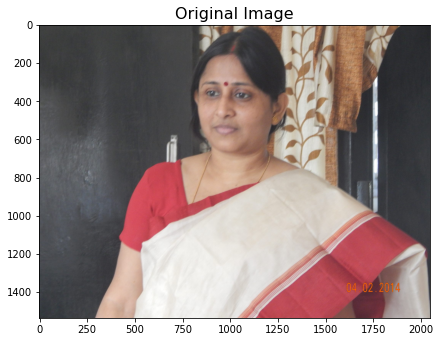

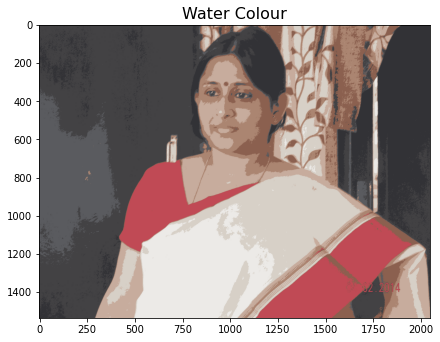

In [ ]:
image = cv2.imread("mom.jpg")

# we reshaped the image into a 2D array of pixels which has 3 colour values i.e RGB
pixel_values = image.reshape((-1, 3))

# the above obtained values were converted into float
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 9
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# we again converted it into 8 bit values
centers = np.uint8(centers)

# labels were flattened
labels = labels.flatten()

# the pixels were convereted into the colour of centroids
segmented_image = centers[labels.flatten()]

# again reshaped to original dimension
segmented_image = segmented_image.reshape(image.shape)
show("Original Image",image,True)
show("Water Colour",segmented_image,True)


Now, in the next filter, we tried to create a cool cartoon effect.
This was done in 5 simple steps:

1.  We perform [Bilateral Filter](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html) to reduce the color palette.Repeatedly (say, four times via num_bilateral=4) a small bilateral filter was applied, instead of applying a large bilateral filter once(to improve the speed).
2. Convert the original image to grayscale.
3. [Median Blur](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html) was applied to reduce the noise.
4. We used [adaptive thresholding](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) function we create an edge mask.
5. Colour image and the edge mask was combined.

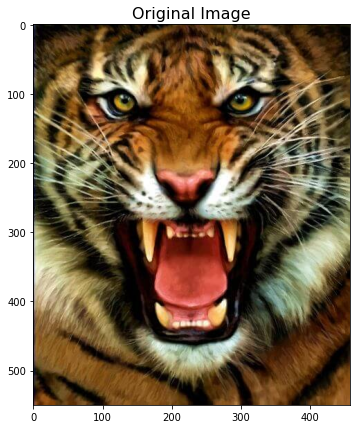

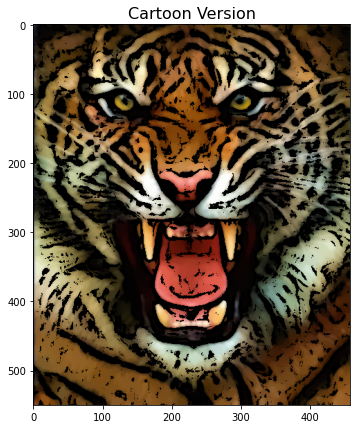

In [ ]:
num_down = 1 
num_bilateral =4

img_rgb = cv2.imread("tiger1.jpg")


img_color = img_rgb
for _ in range(num_down):
    img_color = cv2.pyrDown(img_color)

for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9,
                                    sigmaColor=9,
                                    sigmaSpace=7)
for _ in range(num_down):
    img_color = cv2.pyrUp(img_color)

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 11)

img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=2)
(x,y,z) = img_color.shape 
img_edge = cv2.resize(img_edge,(y,x)) 
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and(img_color, img_edge)

show("Original Image",img_rgb,True)
show("Cartoon Version",img_cartoon,True)


Now, in the final filter, we used the [applyColorMap](https://docs.opencv.org/3.4/d3/d50/group__imgproc__colormap.html) function of the openCV library.
* It maps the existing values of an image with corresponding upper and lower bound of different color schema in justified proportion.
 
* We have used colormap schemas called [Bone](https://docs.opencv.org/3.4/d3/d50/group__imgproc__colormap.html#gga9a805d8262bcbe273f16be9ea2055a65a91d58e66f015ea030150bdc8545d3b41) and [Hot](https://docs.opencv.org/3.4/d3/d50/group__imgproc__colormap.html#gga9a805d8262bcbe273f16be9ea2055a65aef83628a5b46e23bf823000ff0270304)
 
Two images were used, one is of our favourite parrot. And, another of the coder, herself.😉

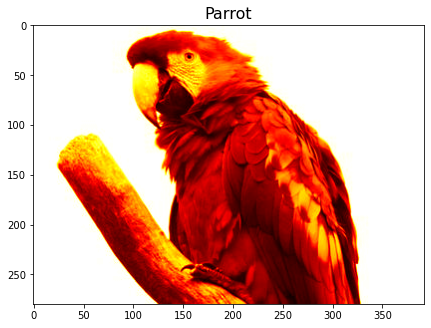

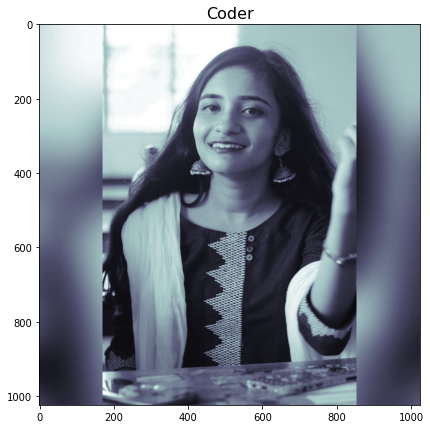

In [143]:
img=cv2.imread("parrot.jpg")
heatmap = cv2.applyColorMap(img, cv2.COLORMAP_HOT)
show("Parrot",heatmap,True)
img=cv2.imread("dp3.jpg")
heatmap = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
show("Coder",heatmap,True)
